<a href="https://colab.research.google.com/github/alexbonella/Tensorflow2/blob/master/Regresion_lineal_IRIS_con_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
# Instalamos tensorflow 2 en la GPU (Google_colab -->>> Gratis )

!pip install tensorflow-gpu==2.0.0-beta1

In [0]:
from __future__ import absolute_import, division, print_function
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf 
import math
import seaborn as sns 
from sklearn import datasets
import pandas as pd 
from scipy.stats import pearsonr

#tf.__version__

# Caso de estudio set de datos IRIS

En el siguiente ejemplo vamos a realizar una regresion lineal en ***`tensorflow2`*** con el Dataset IRIS que se encuentra en ***`sklearn`***

In [0]:
# Cargamos el set de datos de iris 

iris = datasets.load_iris()

In [105]:
iris.feature_names  # Nombre de las columnas 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [106]:
iris.feature_names[2]  # Longitud del petalo

'petal length (cm)'

In [0]:
# Creamos nuestro Dataframe 

df=pd.DataFrame(iris.data)

In [0]:
# Editamos los nombres de las columnas

df=df.rename(columns={0:iris.feature_names[0],1:iris.feature_names[1],2:iris.feature_names[2],3:iris.feature_names[3] } )

In [109]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


# Correlación de las variables 

Como podemos observar existe una fuerte correlacion entre :
1. Ancho y largo del petalo -->> **0.96**
1. Longitud del sepalo y longitud del petalo -->> **0.87**

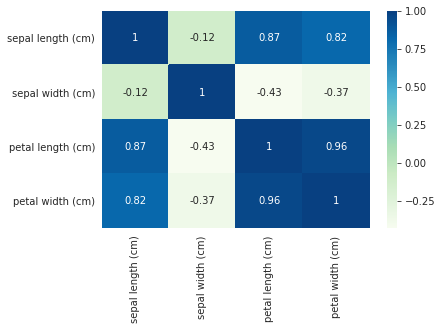

In [110]:
sns.heatmap(df.corr(),cmap='GnBu',annot=True) 

# Agregamos las etiquetas a nuestro Dataframe

In [0]:
df['target']=iris.target

# Agregamos el nombre de la especie 

In [112]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
df.loc[df['target']==0,'kind']='setosa'
df.loc[df['target']==1,'kind']='versicolor'
df.loc[df['target']==2,'kind']='virginica'

In [114]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,kind
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


# Visualizamos nuestros datos 

In [0]:
x_vals = np.array([x[2] for x in iris.data]) # Longitud del Pétalo
y_vals = np.array([x[0] for x in iris.data]) # Longitud del Sépalo

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


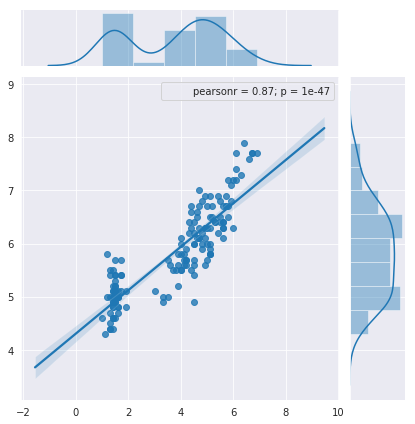

In [116]:
sns.set_style(style='darkgrid')
sns.jointplot(x_vals,y_vals,stat_func=pearsonr,kind="reg")

# Preparación del modelo en Tensorflow 

In [0]:
# Ingresamor parametros 

learning_rate=0.05
batch_size=20
training_steps = 400
rng = np.random
n_samples =len(df) 

$$y=Ax+b$$

# Definimos las funciones de regresion y de perdida 

In [0]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Regresión Lineal (Wx + b).
def linear_regression(x):
    return W*x+b

# Funcion de perdida error cuadratico medio.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred-y_true))

# Optimizador de gradiente descendiente.
optimizer = tf.optimizers.SGD(learning_rate)

In [0]:
# Función de optimizacion . 
def run_optimization():
    # Diferenciacion automatica.
    with tf.GradientTape() as g:
        pred = linear_regression(x_vals)
        loss = mean_square(pred, y_vals)

    # Calculamos el gradiente.
    gradients = g.gradient(loss, [W, b])
    
    # Actualizamos valores de W y b
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [120]:
# Ejecutamos nuestro optimizador para actualizar valores de W y b.
fun_per=[]
for step in range(1, training_steps + 1):
    
    run_optimization()
    
    if step % batch_size == 0:
        pred = linear_regression(x_vals)
        loss = mean_square(pred,y_vals)
        fun_per.append(loss)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 20, loss: 2.379915, W: 1.164159, b: 0.797012
step: 40, loss: 1.269966, W: 0.955478, b: 1.826305
step: 60, loss: 0.717330, W: 0.795763, b: 2.551856
step: 80, loss: 0.440714, W: 0.682609, b: 3.065141
step: 100, loss: 0.302257, W: 0.602553, b: 3.428283
step: 120, loss: 0.232953, W: 0.545914, b: 3.685202
step: 140, loss: 0.198264, W: 0.505842, b: 3.866969
step: 160, loss: 0.180901, W: 0.477492, b: 3.995567
step: 180, loss: 0.172210, W: 0.457434, b: 4.086549
step: 200, loss: 0.167860, W: 0.443244, b: 4.150918
step: 220, loss: 0.165682, W: 0.433205, b: 4.196457
step: 240, loss: 0.164592, W: 0.426102, b: 4.228676
step: 260, loss: 0.164047, W: 0.421077, b: 4.251471
step: 280, loss: 0.163774, W: 0.417521, b: 4.267599
step: 300, loss: 0.163637, W: 0.415006, b: 4.279008
step: 320, loss: 0.163569, W: 0.413226, b: 4.287081
step: 340, loss: 0.163535, W: 0.411967, b: 4.292791
step: 360, loss: 0.163517, W: 0.411076, b: 4.296832
step: 380, loss: 0.163509, W: 0.410446, b: 4.299691
step: 400, loss:

# Visualizamos los resultados



In [0]:
# Guardamos los ultimos resultados de W y b 

slope=W.numpy()
intercept=b.numpy()

In [122]:
print('La ecuación de la recta es : ' )
print('\n') 
print(str(np.round(slope,3))+ 'x +' + str(np.round(intercept,3)))

La ecuación de la recta es : 


0.41x +4.302


In [0]:
best_fit=[]
for i in x_vals:
  best_fit.append(slope*i + intercept)

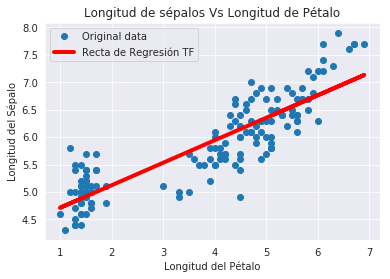

In [124]:
# Configuración de nuestro grafico
plt.title('Longitud de sépalos Vs Longitud de Pétalo')
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Longitud del Sépalo')
plt.plot(x_vals, y_vals, 'o', label='Original data')
plt.plot(x_vals,best_fit,'r-',label='Recta de Regresión TF',linewidth=4)
plt.legend()
plt.show()

In [125]:
fun_per

[<tf.Tensor: id=56595, shape=(), dtype=float32, numpy=2.3799155>,
 <tf.Tensor: id=57450, shape=(), dtype=float32, numpy=1.269966>,
 <tf.Tensor: id=58305, shape=(), dtype=float32, numpy=0.71732974>,
 <tf.Tensor: id=59160, shape=(), dtype=float32, numpy=0.4407138>,
 <tf.Tensor: id=60015, shape=(), dtype=float32, numpy=0.30225685>,
 <tf.Tensor: id=60870, shape=(), dtype=float32, numpy=0.23295331>,
 <tf.Tensor: id=61725, shape=(), dtype=float32, numpy=0.19826424>,
 <tf.Tensor: id=62580, shape=(), dtype=float32, numpy=0.1809011>,
 <tf.Tensor: id=63435, shape=(), dtype=float32, numpy=0.17221004>,
 <tf.Tensor: id=64290, shape=(), dtype=float32, numpy=0.16785981>,
 <tf.Tensor: id=65145, shape=(), dtype=float32, numpy=0.16568235>,
 <tf.Tensor: id=66000, shape=(), dtype=float32, numpy=0.16459247>,
 <tf.Tensor: id=66855, shape=(), dtype=float32, numpy=0.16404693>,
 <tf.Tensor: id=67710, shape=(), dtype=float32, numpy=0.16377383>,
 <tf.Tensor: id=68565, shape=(), dtype=float32, numpy=0.16363718>,


In [0]:
itera=[]
for i in range(len(fun_per)):
  itera.append(i)

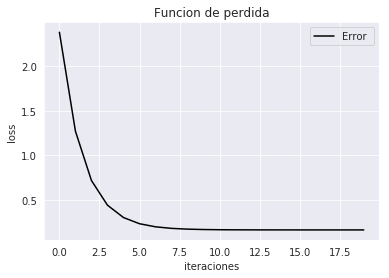

In [127]:
plt.title('Funcion de perdida')
plt.xlabel('iteraciones')
plt.ylabel('loss')
plt.plot(itera, fun_per, '-k', label='Error ')
#plt.plot(x_vals,best_fit,'r-',label='Recta de Regresión TF',linewidth=4)
plt.legend()
plt.show()

# FINAL